In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("/content/titanic.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def process_dataset(data):
  df = data.copy()

  #pre-processing
  df['family_size'] = df.SibSp + df.Parch + 1
  df['is_alone'] = (df.family_size==0)
  df['has_cabin'] = df.Cabin.notnull()

  #encoding categorical features
  df.drop('Cabin', axis=1, inplace=True)
  df.Embarked = df.Embarked.astype('category').cat.codes
  df.Sex = df.Sex.astype('category').cat.codes

  #Processing Tickets
  df.Ticket = df.Ticket.str.split(" ").str[-1]

  #Handling missing values
  df['Age_p'] = df.Age.isnull() # adding an extra column indicating whether the value are present or not.
  df.loc[df.Age.isnull(), 'Age'] = df.Age.mean()
  df.Age = df.Age.astype('int')

  ## Dropping recordes
  df.drop(df.loc[df.Ticket == 'LINE'].index, axis=0, inplace=True)

  return df.drop('Survived', axis=1), df.Survived



###**With Processing**

In [ ]:
X,y = process_dataset(dataset)

In [ ]:
X.drop('Name', axis=1,inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(100)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.8033707865168539

Let's look at the importance value of each feature

In [ ]:
clf.feature_importances_

array([0.12695239, 0.06784713, 0.22375576, 0.11998561, 0.02586378,
       0.01876153, 0.14782701, 0.14742671, 0.02399693, 0.04486378,
       0.        , 0.04053696, 0.0121824 ])

In [ ]:
feature_importance = pd.DataFrame({'importance':clf.feature_importances_}, index = X.columns).sort_values('importance')

In [ ]:
feature_importance

,importance
is_alone,0.000000
Age_p,0.012182
Parch,0.018762
Embarked,0.023997
SibSp,0.025864
has_cabin,0.040537
family_size,0.044864
Pclass,0.067847
Age,0.119986
PassengerId,0.126952


<Axes: >

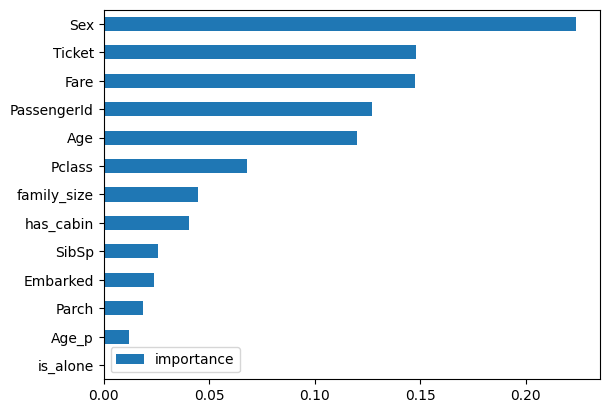

In [ ]:
feature_importance.plot.barh()

In [ ]:
feature_importance[feature_importance.importance > 0.05]

,importance
Pclass,0.067847
Age,0.119986
PassengerId,0.126952
Fare,0.147427
Ticket,0.147827
Sex,0.223756


In [ ]:
to_keep = feature_importance[feature_importance.importance > 0.05].index

#**LOFO (Leave One Feature Out)**

In [ ]:
x = X[to_keep]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
clf = RandomForestClassifier(100)

In [ ]:
clf.fit(X_train,y_train)
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.8426966292134831

In [ ]:
results = {}
for col in X.columns:
  x_temp = X.drop(col, axis=1)
  X_train, X_test, y_train, y_test = train_test_split(x_temp,y, test_size=0.2)
  clf = RandomForestClassifier(100)
  clf.fit(X_train, y_train)

  results[col] = [clf.score(X_train,y_train), clf.score(X_test,y_test)]


In [ ]:
pd.DataFrame(results).T.sort_values(by=1)

,0,1
Sex,1.00000,0.702247
family_size,1.00000,0.764045
Embarked,1.00000,0.814607
Pclass,1.00000,0.820225
Age,1.00000,0.820225
PassengerId,0.99859,0.825843
Ticket,1.00000,0.825843
Fare,1.00000,0.825843
Age_p,1.00000,0.825843
Parch,1.00000,0.831461


### More Efficient Method

In [ ]:
x, y = process_dataset(dataset)

In [ ]:
x.drop('Name', axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# clf = RandomForestClassifier()
clf = SVC(gamma='scale')
clf.fit(X_train, y_train)
clf.score(X_train,y_train), clf.score(X_test, y_test)

(0.6177715091678421, 0.6067415730337079)

In [ ]:
results ={}
for name, col in X_train.items():
    temp_x_train = X_train.copy()
    temp_x_train[name] = np.random.permutation(col)
#     print(f'{name} shuffled: Train_score: {clf.score(temp_x_train, y_train):.3f}')
    results[name]= clf.score(temp_x_train, y_train)

In [ ]:
pd.Series(results).sort_values()

PassengerId    0.617772
Pclass         0.617772
Sex            0.617772
Age            0.617772
SibSp          0.617772
Parch          0.617772
Ticket         0.617772
Fare           0.617772
Embarked       0.617772
family_size    0.617772
is_alone       0.617772
has_cabin      0.617772
Age_p          0.617772
dtype: float64